<p align="center"><b>DEEP LEARNING PARA PROCESSAMENTO DE LINGUAGEM E VISÃO</b></p>
<p align="justify"><b>Turma 1B - 2022/1</b></p>
<p><b>Trilha 6:</b> Tarefa (Peso 3)</p>
<p></p>
<p align='justify'>A mineração de textos é uma das principais atividades do processamento de linguagem natural. Diferentes domínios podem construir aplicações para entender melhor os dados textuais, como grandes portais jornalísticos, que constroem sistemas inteligentes para categorizar notícias.</p>
<p align='center'><img src=https://dhg1h5j42swfq.cloudfront.net/2021/05/11111019/image-255.png></p>
<p align='justify'>Nesta tarefa, você deverá desenvolver um categorizador de notícias utilizando redes neurais recorrentes. Para isso, utilize o conjunto de dados <i>Reuters</i> presente nativamente no TensorFlow-Keras.</p>



In [70]:
# Carregando os dados
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, SimpleRNN, GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import LSTM
import numpy as np
import tensorflow as tf
from keras.datasets import reuters
from keras.preprocessing.text import Tokenizer

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)

In [71]:
# Total de Labels
total_labels = len(np.unique(y_train))
print(f'Total de rótulos: {total_labels}')

Total de rótulos: 46


In [72]:
# Recuperando os índices de mapeamento {dict} para seu índice no conjunto de dados do reuters.

word_index = reuters.get_word_index(path="reuters_word_index.json")

# Percorrendo o dicionário word_index e recuparando cada palavra com seu respectivo índice.
index_to_word = {}

for key, value in word_index.items():
    index_to_word[value] = key

# Imprimindo apenas alguns exemplos de Reviews com seus respectivos Labels
frases = []
for i in range(2):
    frase = ' '.join([index_to_word[x] for x in X_train[i]])
    frases.append(frase)
    for review, label in zip(frases, y_train):
        print('REVIEW: ', review[:200], "...")
        print('LABEL : ', label, '\n')

REVIEW:  the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states ...
LABEL :  3 

REVIEW:  the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states ...
LABEL :  3 

REVIEW:  the termination payment airport takes 6 of geological 3 6 602 begin up said fully bank expects commodity total is giant a of this takes of series termination payment airport mln a for capital 1 pre 50 ...
LABEL :  4 



In [73]:
# Preprocessando o conjunto de dados 
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')

y_train = tf.keras.utils.to_categorical(y_train, total_labels)
y_test = tf.keras.utils.to_categorical(y_test, total_labels)

In [81]:
# Construindo um Modelo

model = Sequential()
model.add(Dense(256,  activation='relu', input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(256,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))


NumEpochs = 10
BatchSize = 100

# Compilando o Modelo
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

# Treinando o Modelo
history = model.fit(X_train,y_train,epochs=NumEpochs,batch_size=BatchSize,verbose=1, validation_data=(X_test, y_test))



Epoch 1/10
90/90 [==============================] - 2s 17ms/step - loss: 1.8348 - accuracy: 0.5884 - val_loss: 1.2565 - val_accuracy: 0.7035
Epoch 2/10
90/90 [==============================] - 1s 16ms/step - loss: 1.0620 - accuracy: 0.7548 - val_loss: 1.0243 - val_accuracy: 0.7671
Epoch 3/10
90/90 [==============================] - 1s 16ms/step - loss: 0.7516 - accuracy: 0.8272 - val_loss: 0.9514 - val_accuracy: 0.7823
Epoch 4/10
90/90 [==============================] - 1s 15ms/step - loss: 0.5353 - accuracy: 0.8695 - val_loss: 0.9357 - val_accuracy: 0.8005
Epoch 5/10
90/90 [==============================] - 1s 15ms/step - loss: 0.4196 - accuracy: 0.8961 - val_loss: 0.9669 - val_accuracy: 0.8010
Epoch 6/10
90/90 [==============================] - 1s 15ms/step - loss: 0.3381 - accuracy: 0.9182 - val_loss: 0.9569 - val_accuracy: 0.8126
Epoch 7/10
90/90 [==============================] - 1s 15ms/step - loss: 0.2902 - accuracy: 0.9292 - val_loss: 0.9900 - val_accuracy: 0.8068
Epoch 8/10
90

In [79]:
score = model.evaluate(X_test, y_test, batch_size=BatchSize, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

23/23 [==============================] - 0s 4ms/step - loss: 1.0470 - accuracy: 0.8099
Test loss: 1.0470060110092163
Test accuracy: 0.809884250164032


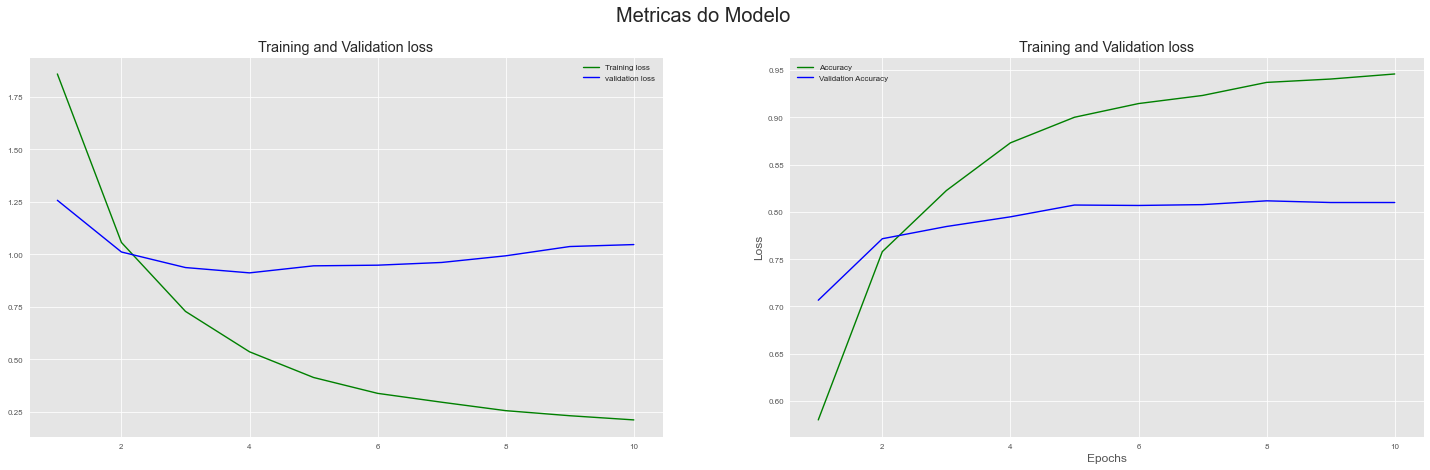

In [80]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(25,7))
loss_train = history.history['loss']
loss_val = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,NumEpochs+1)

fig.suptitle('Metricas do Modelo', fontsize=20)
ax[0].plot(epochs, loss_train, 'g', label='Training loss')
ax[0].plot(epochs, loss_val, 'b', label='validation loss')
ax[0].set_title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax[0].legend()


ax[1].plot(epochs, acc, 'g', label='Accuracy')
ax[1].plot(epochs, val_acc, 'b', label='Validation Accuracy')
ax[1].set_title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
ax[1].legend()

plt.show()